In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

D:\ANACONDAMAIN\envs\DAB300\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\ANACONDAMAIN\envs\DAB300\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\ANACONDAMAIN\envs\DAB300\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\ANACONDAMAIN\envs\DAB300\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# get data from yahoo finance website
data = pd.DataFrame()
data["DELL"] = yf.download("DELL", start="2021-07-19",end="2022-07-15")['Adj Close']
data.head()

[*********************100%***********************]  1 of 1 completed


,DELL
Date,
2021-07-19,46.388454
2021-07-20,47.632072
2021-07-21,48.051605
2021-07-22,47.916756
2021-07-23,48.221416


In [3]:
# transform data to log-returns
ticker = 'DELL'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start="2021-07-19",end="2022-07-15")['Adj Close']
data.head()

,DELL
Date,
2021-07-19,46.388454
2021-07-20,47.632072
2021-07-21,48.051605
2021-07-22,47.916756
2021-07-23,48.221416


<AxesSubplot:xlabel='Date'>

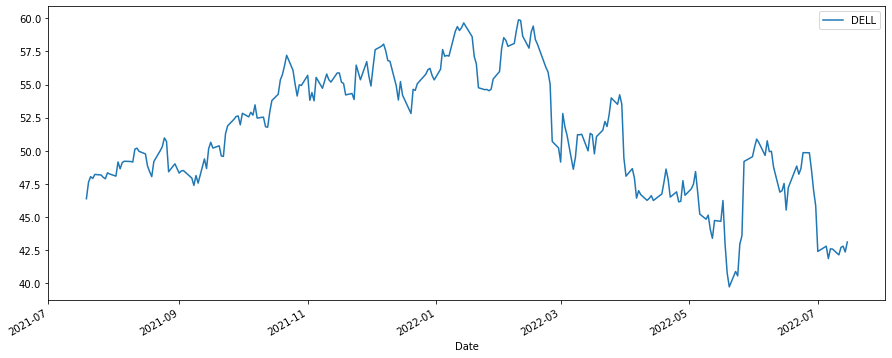

In [4]:
# plot data
data.plot(figsize=(15,6))

In [5]:
stock_returns = np.log(1 + data.pct_change())

stock_returns.tail()

,DELL
Date,
2022-07-11,-0.010305
2022-07-12,0.013329
2022-07-13,0.002088
2022-07-14,-0.010252
2022-07-15,0.017642


D:\ANACONDAMAIN\envs\DAB300\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

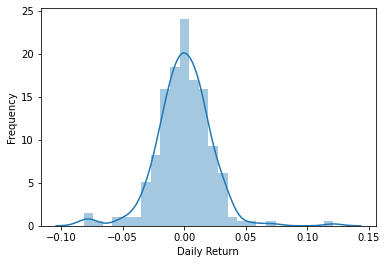

In [6]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

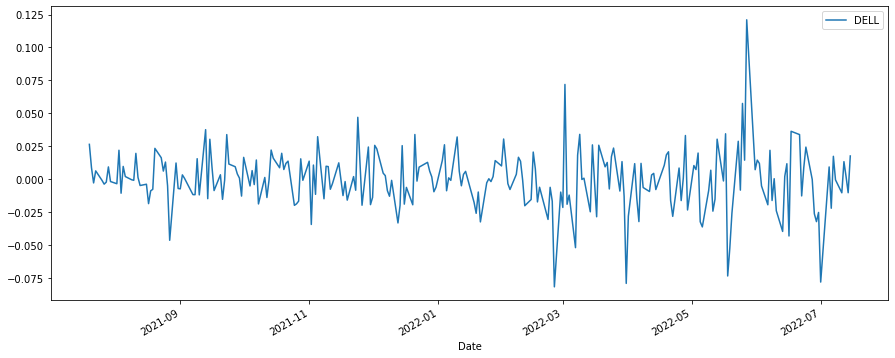

In [7]:
stock_returns.plot(figsize=(15,6))

In [8]:
u = stock_returns.mean()
var = stock_returns.var()

In [9]:
drift = u - (0.5*var)
drift

DELL   -0.000542
dtype: float64

In [10]:
stddev = stock_returns.std() 
stddev

DELL    0.022367
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stddev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([-0.00054186])

In [14]:
drift.values

array([-0.00054186])

In [15]:
stddev.values

array([0.02236676])

In [16]:
x = np.random.rand(10,2)
x

array([[0.03849525, 0.79472021],
       [0.23426842, 0.69062707],
       [0.62889354, 0.824916  ],
       [0.38286271, 0.55496614],
       [0.45059725, 0.39844602],
       [0.04079978, 0.81268984],
       [0.22593297, 0.58093478],
       [0.08039335, 0.74166744],
       [0.83286967, 0.85328786],
       [0.82127758, 0.26211908]])

In [17]:
norm.ppf(x)

array([[-1.76842124,  0.8229093 ],
       [-0.72486178,  0.49762857],
       [ 0.32892428,  0.93426347],
       [-0.29797085,  0.13821852],
       [-0.12415254, -0.25737145],
       [-1.74147948,  0.88785207],
       [-0.75230785,  0.20428545],
       [-1.4024306 ,  0.64849457],
       [ 0.96556747,  1.05063929],
       [ 0.92024482, -0.63682604]])

In [18]:
stdev = stock_returns.std()
days = 30
iterations = 100
#Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations)) #days, trials

In [19]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [20]:
get_daily_returns

array([[0.98576097, 0.99261004, 1.02501545, ..., 0.99947081, 1.00026809,
        1.02464296],
       [1.00418441, 0.99265908, 0.99833776, ..., 1.02322827, 0.95757651,
        1.02899267],
       [1.04284597, 1.03687666, 1.0184815 , ..., 0.98918277, 1.01996249,
        0.98966354],
       ...,
       [0.98796819, 1.01364009, 0.97884362, ..., 1.01494265, 0.94696446,
        0.98110924],
       [1.00387607, 1.01677908, 0.98775831, ..., 1.01589535, 1.00874701,
        0.98447006],
       [0.99771971, 0.99501364, 0.9848091 , ..., 1.01250945, 1.01917088,
        0.99514535]])

In [21]:
S0 = data.iloc[-1]
S0

DELL    43.12569
Name: 2022-07-15 00:00:00, dtype: float64

In [22]:
price_paths = np.zeros_like(get_daily_returns)

In [23]:
price_paths.shape

(30, 100)

In [24]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
price_paths[0] = S0
price_paths

array([[43.12569046, 43.12569046, 43.12569046, ..., 43.12569046,
        43.12569046, 43.12569046],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

In [28]:
price_paths

array([[43.12569046, 43.12569046, 43.12569046, ..., 43.12569046,
        43.12569046, 43.12569046],
       [43.30614608, 42.80910828, 43.05400526, ..., 44.12742572,
        41.29614823, 44.37601924],
       [45.16164012, 44.38776501, 43.84970779, ..., 43.65008931,
        42.1205221 , 43.9173284 ],
       ...,
       [48.06443169, 46.96401296, 42.55199527, ..., 37.07925975,
        32.32738955, 40.08502793],
       [48.25073296, 47.7520261 , 42.03108675, ..., 37.6686476 ,
        32.61015759, 39.46250995],
       [48.14070744, 47.51391719, 41.39259686, ..., 38.13986182,
        33.235323  , 39.2709331 ]])

Text(0, 0.5, 'Stock Prices')

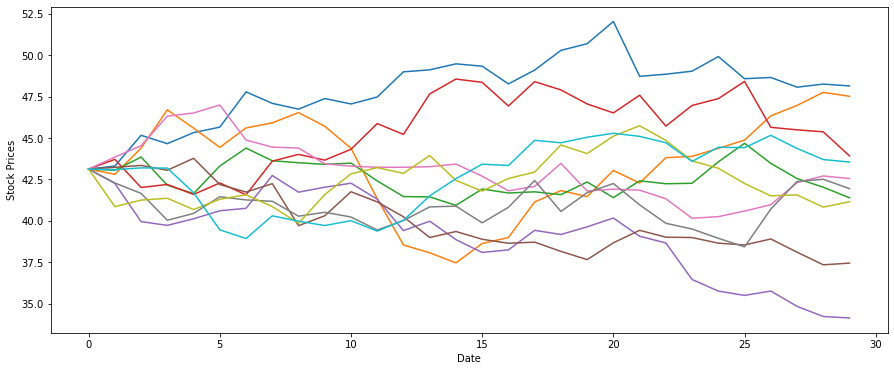

In [29]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])
plt.xlabel("Date")
plt.ylabel("Stock Prices")